<a href="https://colab.research.google.com/github/RomuloPaiva01/ICA/blob/master/ica_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem:

x = As, where s is the vector with the independent sources, x is the vector with the mixtures that are captured and A is the transformation matrix


z = Vx = VAs, where z is the whitened version of x

Let E = ( 1, 2, ..., n ) be the matrix whose columns are the unit-norm eigenvectors of Cx = E\{xx^t} the covariance matrix 

Let D = diag(d1, d2, ..., dn) be the diagonal matrix of the eigenvalues of C

V = (D^(-1/2))*(E^T)

Alg:

1. Center the data to make its mean zero.

2. Whiten the data to give z.

3. Choose m , the number of independent components to estimate.

4. Choose initial values for the wi , i = 1 , ... , m , each of unit norm. Orthogonalize the matrix W
as in step 6 below.


5.

6.


7. If not converged, go back to step 5.
Table 8.4 The FastICA algorithm for estimating several ICs, with symmetric orthogonal-
ization. The expectations are estimated in practice as sample averages.

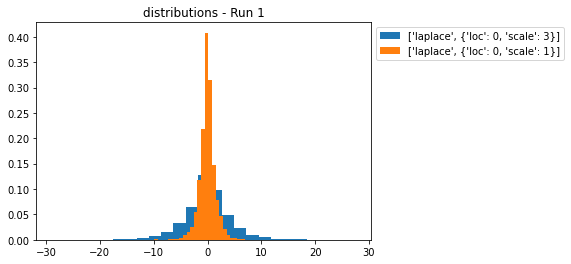

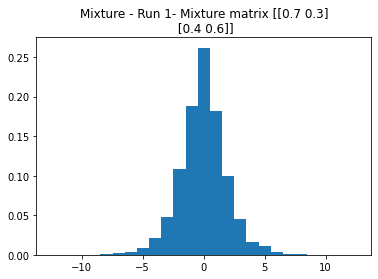

In [1]:
#creating the mixtures
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

#creating the run object
class Run():
    
    def __init__(self, distributions, coefficients, sample_size, name):
        
        self.distributions = distributions
        self.coefficients = coefficients
        self.sample_size = sample_size
        self.name = name
        

#selecting the different distributions with their weights and sample size   
'''
run1 = Run(distributions = [
    {"type": np.random.uniform, "kwargs": {"low": 0, "high":4}},
    {"type": np.random.uniform, "kwargs": {"low": -2, "high":6}},],
    coefficients = np.array([[0.7, 0.3], [0.4, 0.6]]),
    sample_size = 10000,
    name = 'Run 1')

'''
'''
run1 = Run(distributions = [
    {"type": np.random.normal, "kwargs": {"loc": 0, "scale": 3}},
    {"type": np.random.normal, "kwargs": {"loc": 0, "scale": 1}}],
    coefficients = np.array([[0.7, 0.3], [0.4, 0.6]]),
    sample_size = 5000,
    name = 'Run 1')
'''

run1 = Run(distributions = [
    {"type": np.random.laplace, "kwargs": {"loc": 0, "scale": 3}},
    {"type": np.random.laplace, "kwargs": {"loc": 0, "scale": 1}}],
    coefficients = np.array([[0.7, 0.3], [0.4, 0.6]]),
    sample_size = 5000,
    name = 'Run 1')

lst_run = [run1]



#generating and plotting the mixtures
for run in lst_run:

    #number of distributions of each run
    num_distr = len(run.distributions)
    
    #creating a list where we are going to put our data
    data = np.zeros((run.sample_size, num_distr))
    
    #for each distribution I get the data sample, where (a,b) means a from distribution1, b from dist 2 and so on
    for idx, distr in enumerate(run.distributions):
        
        data[:, idx] = distr["type"](size=(run.sample_size,), **distr["kwargs"])
       
    label_distr = []
    
    for i in range((num_distr)):
        label_distr.append([run.distributions[i]['type'].__name__,run.distributions[i]['kwargs']])
        plt.hist(data[np.arange(run.sample_size), i], bins=25, density=True)
    
    plt.title('distributions - ' + run.name)
    plt.legend(label_distr, bbox_to_anchor=(1,1), loc="upper left")
    plt.show()

    #mixing the data
    data_no_mix = data
    data = data @ run.coefficients.T


    #ploting
    plt.hist(data[np.arange(run.sample_size), i], bins=25, density=True)
    plt.title('Mixture - ' + run.name + '- Mixture matrix '+ str(run.coefficients))
    plt.show()



In [2]:
#changing the shape of the vector
data_aux = np.zeros((num_distr, run.sample_size))
data_aux_no_mix = np.zeros((num_distr, run.sample_size))
for i in range(0, run.sample_size):

  data_aux[0][i] = data[i][0]

  data_aux[1][i] = data[i][1]

  data_aux_no_mix[0][i] = data_no_mix[i][0]

  data_aux_no_mix[1][i] = data_no_mix[i][1]


data = data_aux

data_no_mix = data_aux_no_mix

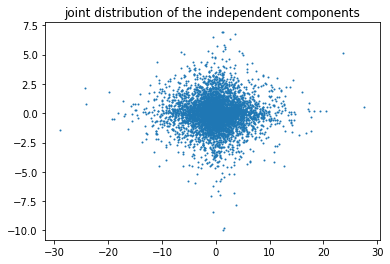

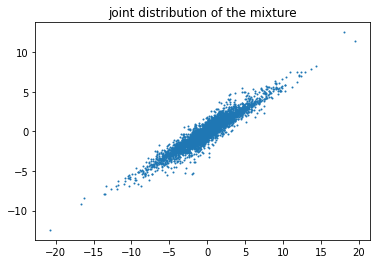

In [3]:
#plotting the joint distributions
def plot_joint(data, title):

  plt.scatter(data[0], data[1], s =1)
  plt.title(title)
  plt.show()


plot_joint(data_no_mix, 'joint distribution of the independent components')

plot_joint(data, 'joint distribution of the mixture')

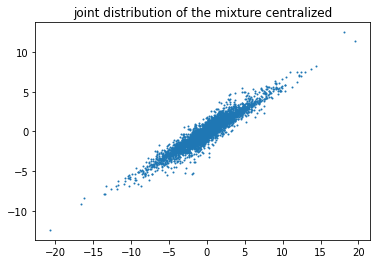

In [4]:
#1- center the data

#We simply find the mean and subtract from each sample
mean = np.mean(data, axis=1)

#data_centered
#data_c = []
data_c = np.zeros((num_distr, run.sample_size))

for i in range(0, run.sample_size):

  data_c[0][i] = data[0][i] - mean[0]

  data_c[1][i] = data[1][i] - mean[1]



plot_joint(data_c, 'joint distribution of the mixture centralized')


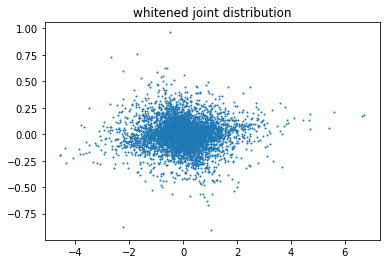

0.3689795291426311


In [5]:
#2- withening the data

'''

Let E = ( 1, 2, ..., n ) be the matrix whose columns are the unit-norm eigenvectors of Cx = E\{xx^t} the covariance matrix 

Let D = diag(d1, d2, ..., dn) be the diagonal matrix of the eigenvalues of C

V = (D^(-1/2))*(E^T)

'''

#first step find the covariance matrix E{xx^t}
C = np.cov(data_c)

#now we can find the unit-norm eigenvectors of C
e_values, e_vectors = np.linalg.eigh(C)


#we need to normalize those vectors
for i in range(len(e_vectors)):

  e_vectors[i] = e_vectors[i]/la.norm(e_vectors[i])


E = e_vectors

#creating an empty D matrix nxn, where n is the number of eigenvalues
D = e_values

#calculating V
z = np.diag(e_values**-1/2) @ e_vectors.T @ data_c

plot_joint(z, 'whitened joint distribution')


neg_entr = 0

#3- choose m, the number of components

m = 2

from scipy.stats import kurtosis


for i in range(m):

  neg_entr +=  (1/12)*(np.mean(z[i]**3))**2  + (1/48)*((kurtosis(z[i]))**2)


print(neg_entr)

wwt [[1.         0.75106027]
 [0.75106027 1.        ]]
fractional [[ 1.37997734 -0.62427729]
 [-0.62427729  1.37997734]]
########
entrando no passo 5
########
W antes [[-0.00223788  0.00910592  0.01573082 ...  0.00835529 -0.00117166
   0.01548329]
 [ 0.01786416  0.02123202  0.00265938 ...  0.00142656  0.02159354
   0.00679979]]
W depois de 1 [[-0.03457075  0.00764686 -0.00886151 ... -0.02494385  0.03137708
  -0.02519706]
 [-0.0075839  -0.00898099 -0.00015804 ... -0.00031905 -0.01239632
   0.00619004]]
wwt [[2.90778618 0.04015476]
 [0.04015476 0.19558256]]
fractional [[ 0.58674119 -0.02483595]
 [-0.02483595  2.264255  ]]
W depois de 2 [[-0.02009573  0.00470978 -0.00519549 ... -0.01462766  0.0187181
  -0.01493789]
 [-0.01631328 -0.02052516 -0.00013776 ... -0.0001029  -0.02884771
   0.01464162]]


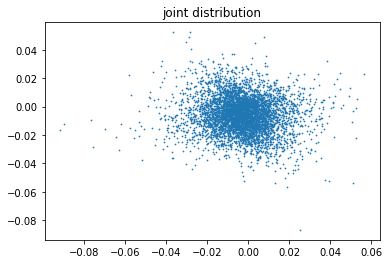

W antes [[-0.02009573  0.00470978 -0.00519549 ... -0.01462766  0.0187181
  -0.01493789]
 [-0.01631328 -0.02052516 -0.00013776 ... -0.0001029  -0.02884771
   0.01464162]]
W depois de 1 [[  -365158.50209829    158186.78872112    -41808.68408906 ...
    -257394.36562002    364640.47436071   -124360.95422802]
 [ 13365456.57450125  -5789964.62976011   1530281.85312658 ...
    9421114.84420504 -13346594.36622639   4551942.28321495]]
wwt [[ 3.64354398e+14 -1.33360420e+16]
 [-1.33360420e+16  4.88123695e+17]]
fractional [[8.80856984e-03 2.40659158e-04]
 [2.40659159e-04 6.57648678e-06]]
W depois de 2 [[-0.00463572 -0.00863954  0.00162938 ...  0.0013249  -0.01908461
   0.0244489 ]
 [ 0.01901059 -0.00852637  0.00223564 ...  0.01352576 -0.01963165
   0.00718564]]


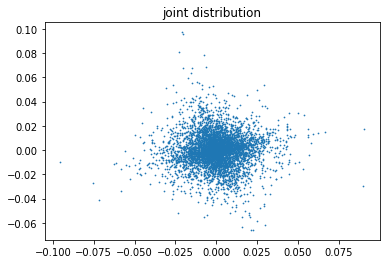

W antes [[-0.00463572 -0.00863954  0.00162938 ...  0.0013249  -0.01908461
   0.0244489 ]
 [ 0.01901059 -0.00852637  0.00223564 ...  0.01352576 -0.01963165
   0.00718564]]
W depois de 1 [[-6.03750230e+01 -8.79068136e+01  1.47032236e+01 ...  6.44745163e+00
  -1.87275278e+02  2.39515943e+02]
 [ 1.28481475e+06  1.06191872e+06 -1.59564224e+05 ...  2.10311670e+05
   2.22977791e+06 -3.25261293e+06]]
wwt [[ 1.00318130e+08 -1.44033398e+12]
 [-1.44033398e+12  2.11777953e+16]]
fractional [[6.51105940e-04 4.42822353e-08]
 [4.42822353e-08 6.87463947e-09]]
W depois de 2 [[ 0.01758393 -0.01021251  0.0025075  ...  0.01351104 -0.0231965
   0.01191728]
 [ 0.00882996  0.00729642 -0.0010963  ...  0.0014461   0.01532063
  -0.02234993]]


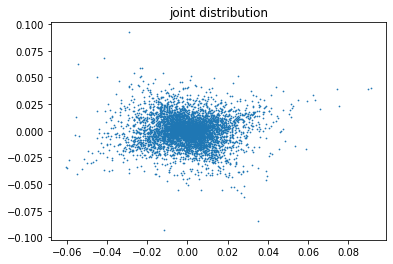

In [6]:
#4- Choose initial values for the wi , i = 1 , ... , m , each of unit norm. Orthogonalize the matrix W with an symmetric orthogonalization.

#for the number of components, I will come up with random unit vectors

#first we need to be able to generate random unit vectors

#dimension
n = run.sample_size


def gen_unit_rand_vec(n):

  #generate random vector
  x = np.random.default_rng().uniform(0,1,n)

  #normalizing it
  x = x/la.norm(x)

  return x
  

#creating the matrix W (or list of vectors)
#W = np.zeros(shape=(m,n), dtype='complex')
W = np.zeros(shape=(m,n))

for i in range(m):

  W[i] = (gen_unit_rand_vec(n))


# W = ((W(W^T)^-1/2)W)
def sym_ortagonalization(W):

  #W = np.dot((la.fractional_matrix_power(np.dot(W, W.transpose(), -1/2)), W))

  print('wwt', W@(W.T) )

  print('fractional', la.fractional_matrix_power((W@(W.T)),-1/2))

  W = (la.fractional_matrix_power((W@(W.T)),-1/2))@W




  return W


W_aux = sym_ortagonalization(W)

W = W_aux



lst_neg_entr = []


print('########')
print('entrando no passo 5')
print('########')

for j in range(3):
  # Step 5

  '''
  wi <- E{zg(wi^T z)} - E{g'(wi^T z)}*w

  where,

  g = y³

  '''



  print('W antes', W)
  #changing the g
  for i in range(m):

    W[i] = (np.dot(z.T, ((np.dot(W[i].T, z.T))**3))) - ((np.dot((3*(np.dot(W[i].T, z.T))**2), W)))

    
  '''
  now we have to define an approximation to the mutual information

  I(y1, y2, ..., yn) = -Sum(E{Gi(yi)}) -log|det B| - H(x)

  s = Bx

  H is the differential entropy



  another approximation and the one that we are going to use is

  I(Y) = const - Sum(J(yi))

  J(y) aprox = 1/12 * E{y³}² + 1/48 * kurt(y)^2

  '''

  print('W depois de 1', W)

  W_aux = sym_ortagonalization(W)

  W = W_aux

  print('W depois de 2', W)


  neg_entr = 0

  for i in range(m):

    neg_entr +=  (1/12)*(np.mean(W[i]**3))**2  + (1/48)*(kurtosis(W[i]))**2


  lst_neg_entr.append(neg_entr)


  def plot_joint2(W):

    lst_x = []

    lst_y = []

    for i in range(len(W[0])):

      lst_x.append(W[0][i])

      lst_y.append(W[1][i])

    plt.scatter(lst_x, lst_y, s =0.5)
    plt.title('joint distribution')
    plt.show()


  plot_joint2(W)

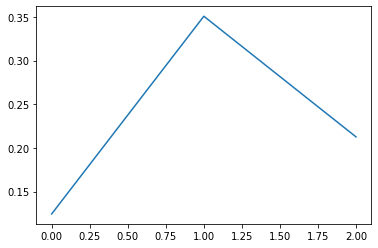

In [7]:
plt.plot(lst_neg_entr)

In [8]:
W.shape

(2, 5000)

(array([  3.,   4.,   3.,   3.,   4.,   9.,  16.,  16.,  21.,  32.,  47.,
         72.,  95., 123., 160., 221., 313., 385., 475., 541., 511., 487.,
        394., 306., 221., 143., 117.,  72.,  51.,  48.,  31.,  22.,  15.,
         11.,   5.,   6.,   4.,   3.,   1.,   2.,   2.,   1.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   2.]),
 array([-0.06022919, -0.05720373, -0.05417826, -0.0511528 , -0.04812734,
        -0.04510188, -0.04207642, -0.03905096, -0.0360255 , -0.03300004,
        -0.02997458, -0.02694912, -0.02392366, -0.02089819, -0.01787273,
        -0.01484727, -0.01182181, -0.00879635, -0.00577089, -0.00274543,
         0.00028003,  0.00330549,  0.00633095,  0.00935642,  0.01238188,
         0.01540734,  0.0184328 ,  0.02145826,  0.02448372,  0.02750918,
         0.03053464,  0.0335601 ,  0.03658556,  0.03961102,  0.04263649,
         0.04566195,  0.04868741,  0.05171287,  0.05473833,  0.05776379,
         0.06078925,  0.06381471,  0.06684017,  0.06986563,  0.0728911 ,
 

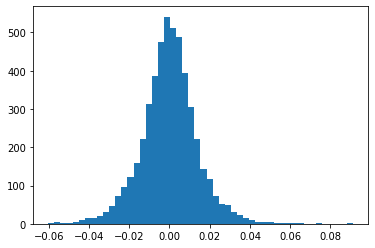

In [9]:
s1 = W[0]

s2 = W[1]


plt.hist(s1, bins = 50)

(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   5.,
          3.,   5.,  13.,  29.,  23.,  31.,  48.,  83., 146., 211., 287.,
        368., 540., 645., 668., 530., 407., 312., 223., 143.,  95.,  62.,
         41.,  22.,  22.,  12.,   6.,   8.,   2.,   1.,   2.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.09293114, -0.08922715, -0.08552315, -0.08181915, -0.07811515,
        -0.07441116, -0.07070716, -0.06700316, -0.06329917, -0.05959517,
        -0.05589117, -0.05218718, -0.04848318, -0.04477918, -0.04107519,
        -0.03737119, -0.03366719, -0.02996319, -0.0262592 , -0.0225552 ,
        -0.0188512 , -0.01514721, -0.01144321, -0.00773921, -0.00403522,
        -0.00033122,  0.00337278,  0.00707678,  0.01078077,  0.01448477,
         0.01818877,  0.02189276,  0.02559676,  0.02930076,  0.03300475,
         0.03670875,  0.04041275,  0.04411675,  0.04782074,  0.05152474,
         0.05522874,  0.05893273,  0.06263673,  0.06634073,  0.07004472,
 

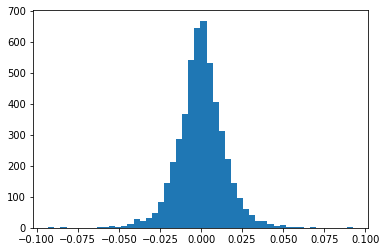

In [10]:
plt.hist(s2, bins = 50)